In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', 100)
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description
0,0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
'''
    TASK: The most common tags (That will also show Top genres from another task)
'''

In [7]:
tags = {}
for i in df.listed_in:
    temp = [x.strip() for x in i.split(',')]
    for j in temp:
        if j not in tags:
            tags[j] = 1
        else:
            tags[j] += 1

tags

{'International TV Shows': 1199,
 'TV Dramas': 704,
 'TV Sci-Fi & Fantasy': 76,
 'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'TV Mysteries': 90,
 'Thrillers': 491,
 'Crime TV Shows': 427,
 'Docuseries': 353,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Anime Series': 148,
 'Reality TV': 222,
 'TV Comedies': 525,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Movies': 56,
 'British TV Shows': 232,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 "Kids' TV": 414,
 'TV Action & Adventure': 150,
 'Spanish-Language TV Shows': 147,
 'Children & Family Movies': 532,
 'TV Shows': 12,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'Stand-Up Comedy': 329,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Classi

In [9]:
tags_df = pd.DataFrame(tags.items(), columns=['Tag', 'Count'])
tags_df.head()

,Tag,Count
0,International TV Shows,1199
1,TV Dramas,704
2,TV Sci-Fi & Fantasy,76
3,Dramas,2106
4,International Movies,2437


In [11]:
tags_df = tags_df.sort_values('Count', ascending=False)


In [12]:
tags_df

,Tag,Count
4,International Movies,2437
3,Dramas,2106
15,Comedies,1471
0,International TV Shows,1199
13,Documentaries,786
6,Action & Adventure,721
1,TV Dramas,704
7,Independent Movies,673
31,Children & Family Movies,532
19,Romantic Movies,531


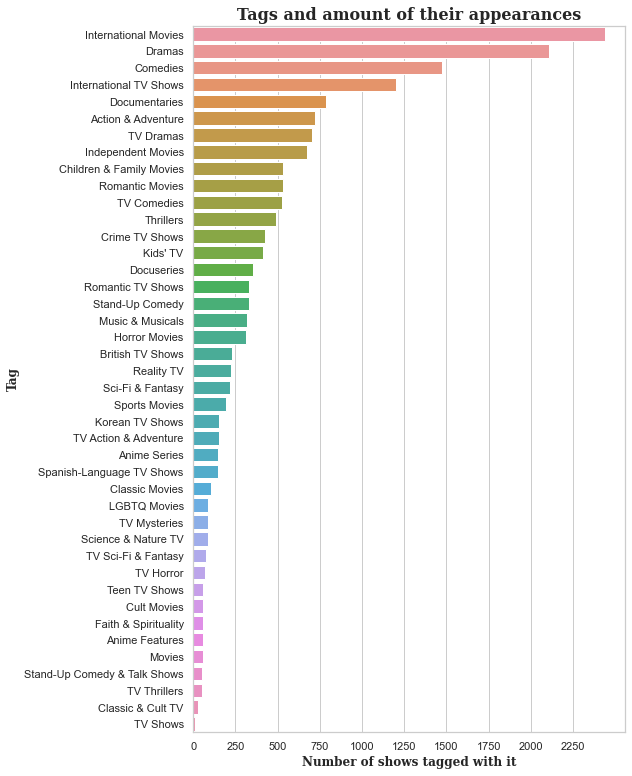

In [19]:
fontdict = {'family': 'serif',
            'weight': 'bold',
            'size': 16 
            }

fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }

plt.figure(figsize=(10, 13))
sns.barplot(data=tags_df, x='Count', y='Tag')
sns.set_theme(style='whitegrid')
plt.title('Tags and amount of their appearances', fontdict=fontdict)
plt.xlabel('Number of shows tagged with it', fontdict=fontdict_smaller)
plt.ylabel('Tag', fontdict=fontdict_smaller)
plt.xticks(np.arange(0, 2500, 250))
plt.subplots_adjust(left=0.3)
plt.savefig('Graphs/tags.png', dpi = 1000)
plt.show()

In [ ]:
'''
    TASK: Top Actors/Actresses (As top I mean the greatest number of roles played)
'''

In [20]:
actors = {}
for i in df.cast:
    temp = [x.strip() for x in i.split(',')]
    for j in temp:
        if j not in actors:
            actors[j] = 1
        else:
            actors[j] += 1

actors

 'Özay Fecht': 1,
 'Suna Yıldızoğlu': 1,
 'Amina Khalil': 4,
 'Ahmed Dawood': 5,
 'Tarek Lotfy': 1,
 'Ahmed El Fishawy': 1,
 'Mahmoud Hijazi': 1,
 'Jihane Khalil': 1,
 'Asmaa Galal': 1,
 'Tara Emad': 3,
 'Samuel L. Jackson': 20,
 'John Heard': 4,
 'Kelly Rowan': 1,
 'Clifton Collins Jr.': 5,
 'Tony Plana': 3,
 'Divya Dutta': 11,
 'Atul Kulkarni': 10,
 'Mohan Agashe': 6,
 'Anupam Shyam': 2,
 'Raayo S. Bakhirta': 2,
 'Yashvit Sancheti': 1,
 'Greeva Kansara': 1,
 'Archan Trivedi': 1,
 'Rajiv Pathak': 1,
 'Rajneesh Duggal': 3,
 'Adah Sharma': 3,
 'Indraneil Sengupta': 6,
 'Anjori Alagh': 1,
 'Rajendranath Zutshi': 8,
 'Vipin Sharma': 13,
 'Amin Hajee': 3,
 'Shri Vallabh Vyas': 2,
 'Thomas Jane': 6,
 'Molly Parker': 6,
 'Dylan Schmid': 1,
 'Kaitlyn Bernard': 2,
 'Bob Frazer': 2,
 "Brian d'Arcy James": 5,
 'Neal McDonough': 4,
 'Robert Więckiewicz': 3,
 'Maciej Musiał': 1,
 'Michalina Olszańska': 1,
 'Andrzej Chyra': 1,
 'Clive Russell': 2,
 'Zofia Wichłacz': 2,
 'Edyta Olszówka': 1,
 'Mateu

In [21]:
actors_df = pd.DataFrame(actors.items(), columns=['Name', 'Count'])
actors_df

,Name,Count
0,João Miguel,1
1,Bianca Comparato,2
2,Michel Gomes,1
3,Rodolfo Valente,1
4,Vaneza Oliveira,1
...,...,...
32877,Malkeet Rauni,1
32878,Anita Shabdish,1
32879,Chittaranjan Tripathy,1
32880,Nasty C,1


In [24]:
actors_df = actors_df.sort_values('Count', ascending=False)
actors_df = actors_df[(actors_df['Count'] >= 20) & (actors_df['Count'] < 700)]
actors_df

,Name,Count
1291,Anupam Kher,42
3988,Shah Rukh Khan,35
2192,Om Puri,30
715,Naseeruddin Shah,30
194,Takahiro Sakurai,29
2190,Akshay Kumar,29
4100,Yuki Kaji,27
1997,Amitabh Bachchan,27
2489,Paresh Rawal,27
738,Boman Irani,27


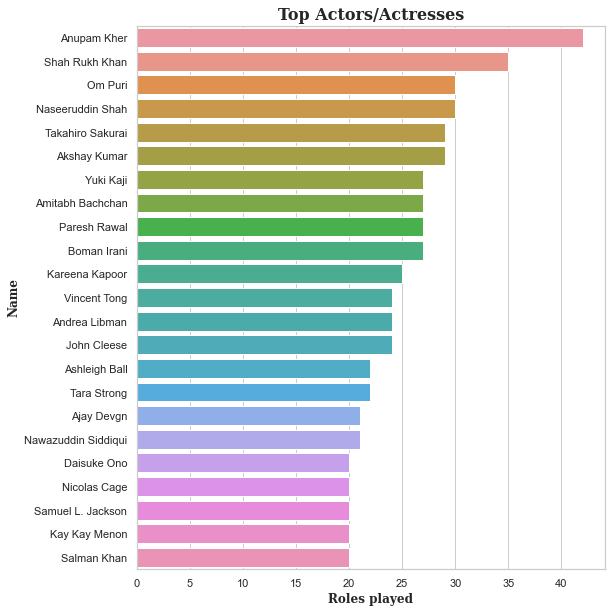

In [27]:
fontdict = {'family': 'serif',
            'weight': 'bold',
            'size': 16 
            }

fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }

plt.figure(figsize=(10, 10))
sns.barplot(data=actors_df, x='Count', y='Name')
sns.set_theme(style='whitegrid')
plt.title('Top Actors/Actresses', fontdict=fontdict)
plt.xlabel('Roles played', fontdict=fontdict_smaller)
plt.ylabel('Name', fontdict=fontdict_smaller)
plt.subplots_adjust(left=0.25)
plt.savefig('Graphs/actors.png', dpi = 1000)
plt.show()

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

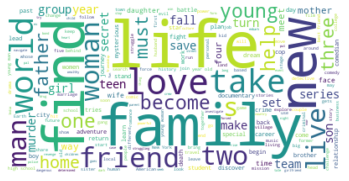

In [42]:
text = ' '.join(desc for desc in df.description)
wordcloud = WordCloud(background_color='white').generate(text)
wordcloud.to_file('Graphs/wordcloud.png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
from PIL import Image

In [37]:
netflix_mask = np.array(Image.open('netflix_mask.png'))
netflix_mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [40]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_netflix_mask = np.ndarray((netflix_mask.shape[0],netflix_mask.shape[1]), np.int32)

for i in range(len(netflix_mask)):
    transformed_netflix_mask[i] = list(map(transform_format, netflix_mask[i]))

transformed_netflix_mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()